In [2]:
import pandas as pd
import matplotlib as plt

In [57]:
df = pd.read_csv('train.csv', index_col='id', parse_dates=['fecha'])
pd.set_option('display.float_format', '{:.2f}'.format)

In [69]:
print(df.columns)
df.head()

Index(['titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,nan,2.00,1.00,2.00,...,23533.00,nan,nan,2015-08-23,0.00,0.00,0.00,0.00,0.00,2273000.00
53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.00,3.00,2.00,2.00,...,24514.00,19.31,-99.23,2013-06-28,0.00,0.00,0.00,1.00,1.00,3600000.00
247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.00,3.00,2.00,2.00,...,48551.00,nan,nan,2015-10-17,0.00,0.00,0.00,0.00,0.00,1200000.00
209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.00,2.00,1.00,1.00,...,53666.00,19.30,-99.69,2012-03-09,0.00,0.00,0.00,1.00,1.00,650000.00
185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.00,2.00,1.00,1.00,...,47835.00,nan,nan,2016-06-07,0.00,0.00,0.00,0.00,0.00,1150000.00


In [27]:
df[['gimnasio','garages','usosmultiples','piscina']].isnull().sum()
#Deberia asumir que los garages que no estan completos significa que esa casa no tiene?

gimnasio             0
garages          37765
usosmultiples        0
piscina              0
dtype: int64

In [34]:
df['escuelascercanas'].isnull().sum()

0

In [58]:
df.groupby('escuelascercanas').agg({'precio':'mean'})

,precio
escuelascercanas,
0.00,2528553.65
1.00,2533697.73


In [59]:
df.groupby(['centroscomercialescercanos','escuelascercanas']).agg({'precio':'mean'})

precio
centroscomercialescercanos escuelascercanas           
0.00                       0.00             2511216.68
                           1.00             2282816.41
1.00                       0.00             2830099.15
                           1.00             2587001.62

/home/ggparente95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


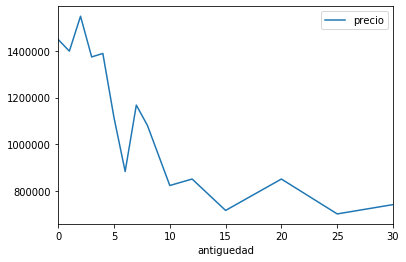

In [231]:

# Influye la antiguedad en el valor de las casas?
# Tomo datos de Apartamentos ubicados en el Distrito Federal, todos con 60 metros cubiertos y analizo el promedio del precio
# Deberia intentar hacer que en el grafico, tambien aparezcan otros tipos de propiedades o sino para distintos metros cubiertos teniendo en cuenta que esas son las caracteristicas que mas inciden

df.groupby('provincia').size().sort_values(ascending=False)

df2 = df[df['provincia']=='Distrito Federal']

df2 = df2[df.metroscubiertos==60]

df2 = df2[df['tipodepropiedad']=='Apartamento']

#Filtro los grupos para que solo me quede con aquellos que sean con mas de 10 casas para poder analizar de mejor forma.
df_final = df2.groupby('antiguedad').filter(lambda x: len(x)>10).groupby('antiguedad').agg({'precio':'median'})

df_final.plot()